In [54]:
import pandas as pd 

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [55]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [57]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [58]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [59]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [61]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=False, figsize=(12,6))
    return survived,dead

(female    233
 male      109
 Name: Sex, dtype: int64,
 male      468
 female     81
 Name: Sex, dtype: int64)

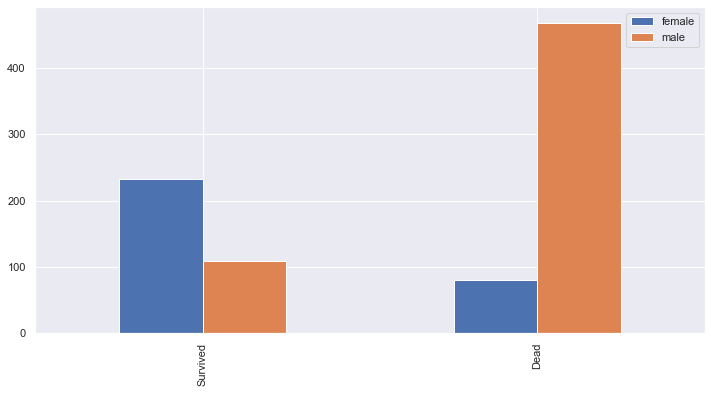

In [62]:
bar_chart("Sex")

(1    136
 3    119
 2     87
 Name: Pclass, dtype: int64,
 3    372
 2     97
 1     80
 Name: Pclass, dtype: int64)

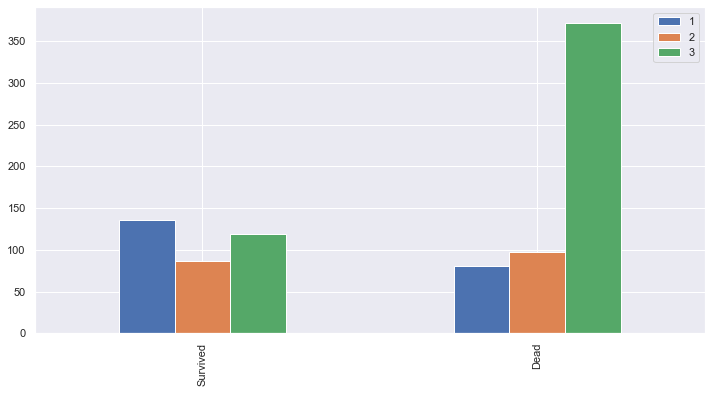

In [63]:
bar_chart("Pclass")

(S    217
 C     93
 Q     30
 Name: Embarked, dtype: int64,
 S    427
 C     75
 Q     47
 Name: Embarked, dtype: int64)

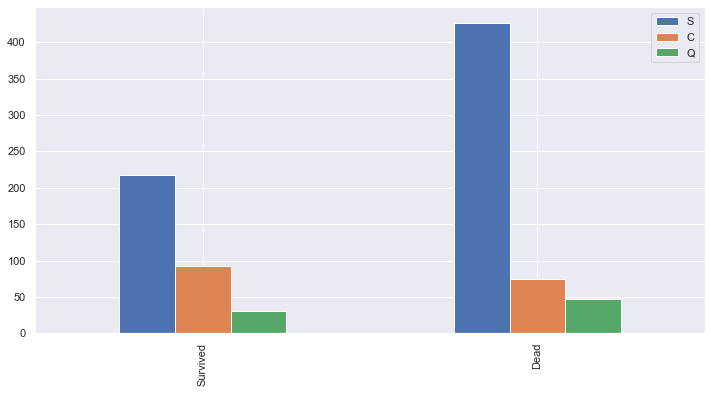

In [64]:
bar_chart("Embarked")

(0    210
 1    112
 2     13
 3      4
 4      3
 Name: SibSp, dtype: int64,
 0    398
 1     97
 2     15
 4     15
 3     12
 8      7
 5      5
 Name: SibSp, dtype: int64)

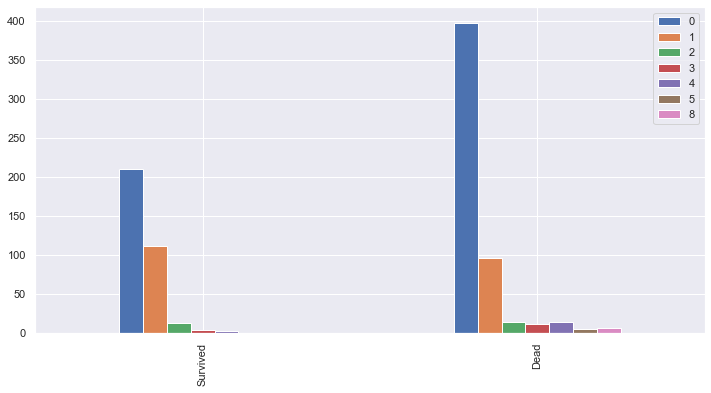

In [65]:
bar_chart("SibSp")

(0    233
 1     65
 2     40
 3      3
 5      1
 Name: Parch, dtype: int64,
 0    445
 1     53
 2     40
 4      4
 5      4
 3      2
 6      1
 Name: Parch, dtype: int64)

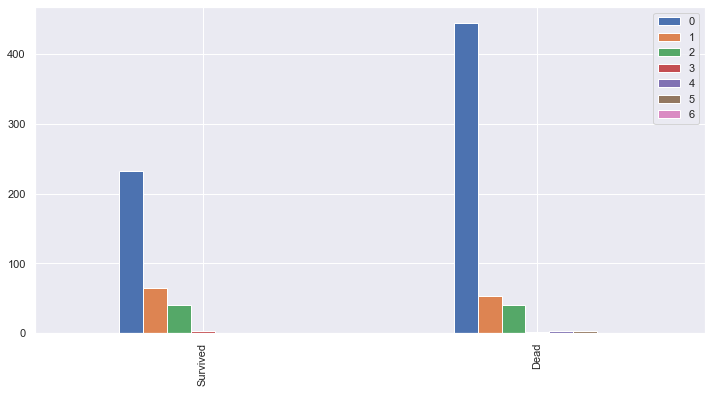

In [66]:
bar_chart("Parch")

In [67]:
train_test_data = [train,test]

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [68]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Capt          1
Jonkheer      1
Mme           1
Lady          1
Countess      1
Sir           1
Don           1
Name: Title, dtype: int64

In [69]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [70]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 4, "Rev": 4, "Col": 4, "Major": 4, "Mlle": 4,"Countess": 4,
                 "Ms": 4, "Lady": 4, "Jonkheer": 4, "Don": 4, "Dona" : 4, "Mme": 4,"Capt": 4,"Sir": 4 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [71]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [73]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


(1    127
 2     99
 0     81
 3     23
 4     12
 Name: Title, dtype: int64,
 0    436
 1     55
 2     26
 3     17
 4     15
 Name: Title, dtype: int64)

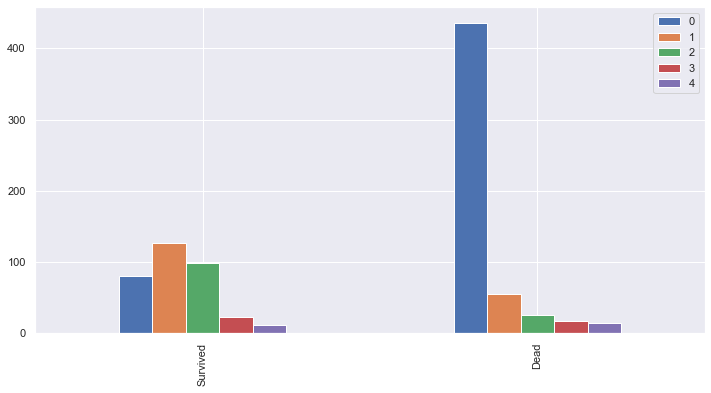

In [74]:
bar_chart("Title")

In [75]:
test.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2
5,897,3,male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,female,30.0,0,0,330972,7.6292,NaN,Q,1
7,899,2,male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,female,18.0,0,0,2657,7.2292,NaN,C,2
9,901,3,male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


In [76]:
gender_mapping = {"male" : 0, "female": 1}

for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(gender_mapping)

In [77]:
test.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2
5,897,3,0,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,1,30.0,0,0,330972,7.6292,NaN,Q,1
7,899,2,0,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,1,18.0,0,0,2657,7.2292,NaN,C,2
9,901,3,0,21.0,2,0,A/4 48871,24.1500,NaN,S,0


In [78]:
embarked_mapping = {"S" : 0, "C": 1, "Q": 2}

for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [79]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    int64  
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 36.0+ KB


In [80]:
train["Embarked"].fillna(method="pad", inplace=True)

In [81]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [82]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    float64
 11  Title        891 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 83.7+ KB


In [83]:
test["Age"].fillna(test.groupby("Sex")["Age"].transform("mean"), inplace=True)
train["Age"].fillna(train.groupby("Sex")["Age"].transform("mean"), inplace=True)

In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    float64
 11  Title        891 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 83.7+ KB


In [85]:
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [86]:
train.drop('Ticket', axis=1, inplace=True)
test.drop('Ticket', axis=1, inplace=True)

In [87]:
train.drop('PassengerId', axis=1, inplace=True)

In [88]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [89]:
train["Fare"].value_counts()

2    229
0    223
1    217
3    169
4     44
5      9
Name: Fare, dtype: int64

In [90]:
test["Fare"].value_counts()

0    115
2    102
1     93
3     77
4     23
5      8
Name: Fare, dtype: int64

In [91]:
def age_feature_engineering(dataset):
    
    dataset.loc[dataset['Age'] <=15, 'Age'] = 0 
    dataset.loc[(dataset['Age'] > 15) & (dataset['Age'] <=30), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <=45), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 45) & (dataset['Age'] <=60), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 60) & (dataset['Age'] <=75), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 75), 'Age'] = 4
    
    return dataset['Age'].astype('int8')

In [92]:
age_feature_engineering(train)

0      1
1      2
2      1
3      2
4      2
      ..
886    1
887    1
888    1
889    1
890    2
Name: Age, Length: 891, dtype: int8

In [93]:
age_feature_engineering(test)

0      2
1      3
2      4
3      1
4      1
      ..
413    1
414    2
415    2
416    1
417    1
Name: Age, Length: 418, dtype: int8

In [94]:
def RelativesOnboard(dataset):
    
    dataset["RelativesOnboard"] = dataset["SibSp"] + dataset["Parch"]
    
    return dataset['RelativesOnboard'].astype('int8')

In [95]:
RelativesOnboard(train)

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: RelativesOnboard, Length: 891, dtype: int8

In [96]:
RelativesOnboard(test)

0      0
1      1
2      0
3      0
4      2
      ..
413    0
414    0
415    0
416    0
417    2
Name: RelativesOnboard, Length: 418, dtype: int8

In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          891 non-null    int64  
 1   Pclass            891 non-null    int64  
 2   Sex               891 non-null    int64  
 3   Age               891 non-null    float64
 4   SibSp             891 non-null    int64  
 5   Parch             891 non-null    int64  
 6   Fare              891 non-null    int32  
 7   Embarked          891 non-null    float64
 8   Title             891 non-null    int64  
 9   RelativesOnboard  891 non-null    int64  
dtypes: float64(2), int32(1), int64(7)
memory usage: 66.3 KB


In [98]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,RelativesOnboard
0,892,3,0,2.0,0,0,0,2,0,0
1,893,3,1,3.0,1,0,0,0,2,1
2,894,2,0,4.0,0,0,1,2,0,0
3,895,3,0,1.0,0,0,1,0,0,0
4,896,3,1,1.0,1,1,1,0,2,2


In [99]:
X_train = train[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked","Title","RelativesOnboard"]]
Y_train = train[["Survived"]]

In [100]:
X_test = test[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked","Title","RelativesOnboard"]]

In [101]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)

LinearRegression()

In [102]:
prediction = linear_regressor.predict(X_test)

In [103]:
prediction = [1 if p>0.5 else 0 for p in prediction]

In [104]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submissionLinearRegression2.csv', index=False)

In [105]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=120, use_label_encoder = False)
xgb.fit(X_train, Y_train)

predictedxgb = xgb.predict(X_test)

[21:56:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [106]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": predictedxgb
    })

submission.to_csv('submissionXGBClassifier2.csv', index=False)

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
RFC = RandomForestClassifier(n_estimators=120, random_state=42)

In [109]:
RFC.fit(X_train,Y_train)

<ipython-input-109-2ace1622d16e>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC.fit(X_train,Y_train)


RandomForestClassifier(n_estimators=120, random_state=42)

In [110]:
predictRFC = RFC.predict(X_test)

In [111]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": predictRFC
    })

submission.to_csv('submissionRandomForestClassifier2.csv', index=False)